In [1]:
from IPython.display import Audio, Image, YouTubeVideo

# LESSON 8: Sentiment Prediction with RNNs

## CHAPTER 1: Sentiment Analysis RNNs

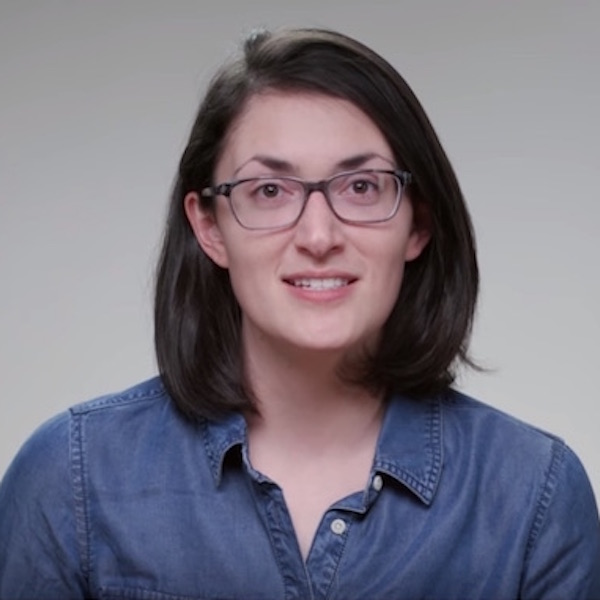
*Guess who? It's Cezanne again!*

### Sentiment Analysis and Prediction

Welcome to this lesson on sentiment analysis and prediction. Here you'll be building a model that can read in some text and make a prediction about the sentiment of that text, where it is positive or negative. We'll be training the model on a dataset of movie reviews from IMDB that have been labeled either "positive" or "negative". Since this is text data, words in a sequence, we can use an RNN to build a model that doesn't only consider the individual words, but the order they appear in. This leads to a powerful model for making these types of sentiment predictions.

See you in the classroom!


## CHAPTER 2: Notebook: Sentiment RNN

### Notebook: Sentiment RNN

The next few videos will be all about implementing a complete RNN that can classify the sentiment of movie reviews (positive or negative).

__It's suggested that you open the notebook in a new, working tab and continue working on it as you go through the instructional videos in this tab.__ This way you can toggle between learning new skills and coding/applying new skills.

To open this notebook, go to our notebook repo (available [from here on Github](https://github.com/udacity/deep-learning-v2-pytorch)) and open the notebook __Sentiment_RNN_Exercise.ipynb in the sentiment-rnn__ folder. You can either download the repository with ``git clone https://github.com/udacity/deep-learning-v2-pytorch.git``, or download it as an archive file from [this link.](https://github.com/udacity/deep-learning-v2-pytorch/archive/master.zip)

### Instructions

* Load in text data
* Pre-process that data, encoding characters as integers
* Pad the data such that each review is a standard sequence length
* Define an RNN with embedding and hidden LSTM layers that predicts the sentiment of a given review
* Train the RNN
* See how it performs on test data

This is a self-assessed lab. If you need any help or want to check your answers, feel free to check out the solutions notebook in the same folder, or by clicking [here](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/sentiment-rnn/Sentiment_RNN_Solution.ipynb).

### Note about GPUs

In this notebook, you'll find that training the network is much faster if you use a GPU. However, you can still complete the exercises without a GPU. If you can't use a local GPU, we suggest you use cloud platforms such as [AWS](https://docs.aws.amazon.com/dlami/latest/devguide/gpu.html), [GCP](https://cloud.google.com/gpu/), and [FloydHub](https://www.floydhub.com/) to train your networks on a GPU.


##  CHAPTER 3: Data Pre-Processing

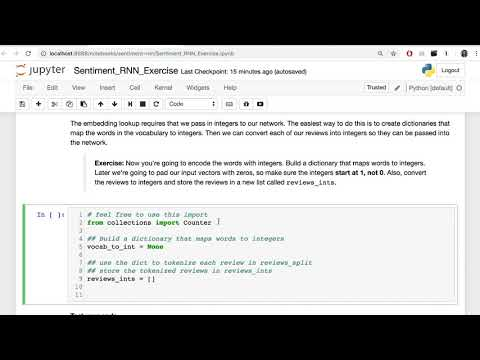

In [2]:
id = 'Xw1MWmql7no'
YouTubeVideo(id=id, width=600)

## CHAPTER 4: Encoding Words, Solution

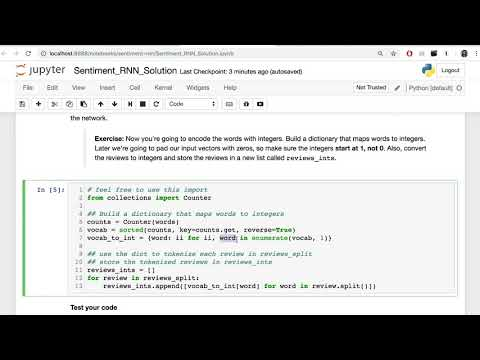

In [3]:
id = '4RYyn3zv1Hg'
YouTubeVideo(id=id, width=600)

## CHAPTER 5: Getting Rid of Zero-Length

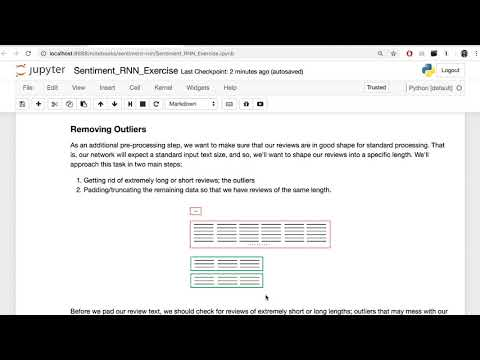

In [4]:
id = 'Hs6ithuvDJg'
YouTubeVideo(id=id, width=600)

## CHAPTER 6: Cleaning & Padding Data

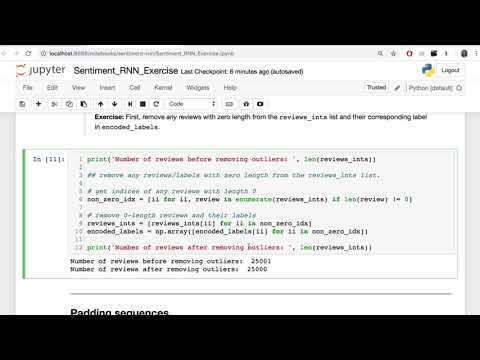

In [5]:
id = 'UgPo1_cq-0g'
YouTubeVideo(id=id, width=600)

## CHAPTER 7: Padded Features, Solution

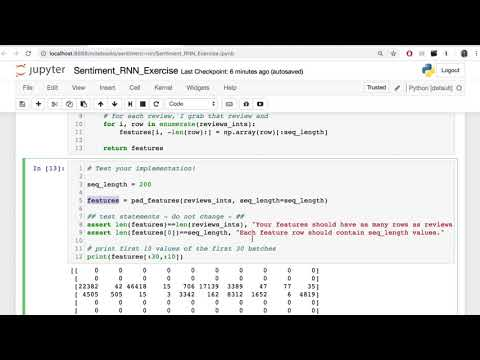

In [6]:
id = 'sYOd1IDmep8'
YouTubeVideo(id=id, width=600)

## CHAPTER 8: TensorDataset & Batching Data

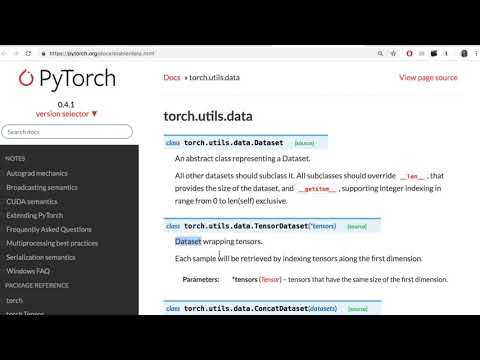

In [7]:
id = 'Oxuf2QIPjj4'
YouTubeVideo(id=id, width=600)

### Omission: shuffling data

Make sure to shuffle your data, so that your model doesn't learn anything about the ordering of the data, and instead can focus on the content. We can do this with a DataLoader by setting ``shuffle=True``. You'll find this updated code in the exercise and solution notebooks.
```python
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)
```

### TensorDataset

Take a look at the source code for [the TensorDataset class](https://github.com/pytorch/tnt/blob/master/torchnet/dataset/tensordataset.py), you can see that it's "purpose" is to provide an ``easy way to create a dataset out of standard data structures``.


## CHAPTER 9: Defining the Model

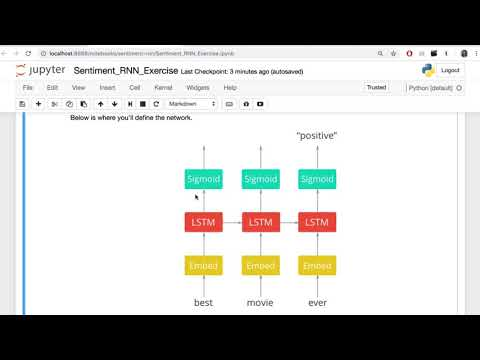

In [8]:
id = 'SpvIZl1YQRI'
YouTubeVideo(id=id, width=600)

## CHAPTER 10: Complete Sentiment RNN

### Consult the Solution Code

To take a closer look at this solution, feel free to check out the solution workspace or click here to see it as a webpage.

### Complete RNN Class

I hope you tried out defining this model on your own and got it to work! Below, is how I completed this model.
>
>    *I know I want an embedding layer, a recurrent layer, and a final, linear layer with a sigmoid applied; I defined all of those in the ``__init__`` function, according to passed in parameters.*
>
```python
def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)

        # dropout layer
        self.dropout = nn.Dropout(0.3)

        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
```

### ``__init__`` explanation

First I have an __embedding layer__, which should take in the size of our vocabulary (our number of integer tokens) and produce an embedding of ``embedding_dim`` size. So, as this model trains, this is going to create and embedding lookup table that has as many rows as we have word integers, and as many columns as the embedding dimension.

Then, I have an __LSTM layer__, which takes in inputs of ``embedding_dim`` size. So, it's accepting embeddings as inputs, and producing an output and hidden state of a hidden size. I am also specifying a number of layers, and a dropout value, and finally, I’m setting ``batch_first`` to True because we are using DataLoaders to batch our data like that!

Then, the LSTM outputs are passed to a dropout layer and then a fully-connected, linear layer that will produce ``output_size`` number of outputs. And finally, I’ve defined a sigmoid layer to convert the output to a value between 0-1.

### Feedforward behavior

Moving on to the ``forward`` function, which takes in an input ``x`` and a ``hidden`` state, I am going to pass an input through these layers in sequence.
```python
def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)

        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)

        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)

        # sigmoid function
        sig_out = self.sig(out)

        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels

        # return last sigmoid output and hidden state
        return sig_out, hidden
```

### ``forward`` explanation

So, first, I'm getting the ``batch_size`` of my input x, which I’ll use for shaping my data. Then, I'm passing x through the embedding layer first, to get my embeddings as output

These embeddings are passed to my lstm layer, alongside a hidden state, and this returns an ``lstm_output`` and a new ``hidden`` state! Then I'm going to stack up the outputs of my LSTM to pass to my last linear layer.

Then I keep going, passing the reshaped ``lstm_output`` to a dropout layer and my linear layer, which should return a specified number of outputs that I will pass to my sigmoid activation function.

Now, I want to make sure that I’m returning only the __last__ of these sigmoid outputs for a batch of input data, so, I’m going to shape these outputs into a shape that is ``batch_size`` first. Then I'm getting the last bacth by called ``sig_out[:, -1]``, and that’s going to give me the batch of last labels that I want!

Finally, I am returning that output and the hidden state produced by the LSTM layer.

### ``init_hidden``

That completes my forward function and then I have one more: ``init_hidden`` and this is just the same as you’ve seen before. The hidden and cell states of an LSTM are a tuple of values and each of these is size (n_layers by batch_size, by hidden_dim). I’m initializing these hidden weights to all zeros, and moving to a gpu if available.
```python
def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

        return hidden
```
After this, I’m ready to instantiate and train this model, you should see if you can decide on good hyperparameters of your own, and then check out the solution code, next!


## CHAPTER 11: Training the Model

### Hyperparameters

After defining my model, next I should instantiate it with some hyperparameters.
```python
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2

net = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)
```
This should look familiar, but the main thing to note here is our ``vocab_size``.

This is actually the length of our ``vocab_to_int`` dictionary (all our unique words) __plus one__ to account for the ``0``-token that we added, when we padded our input features. So, if you do data pre-processing, you may end up with one or two extra, special tokens that you’ll need to account for, in this parameter!

Then, I want my ``output_size`` to be 1; this will be a sigmoid value between 0 and 1, indicating whether a review is positive or negative.

Then I have my embedding and hidden dimension. The embedding dimension is just a smaller representation of my vocabulary of 70k words and I think any value between like 200 and 500 or so would work, here. I’ve chosen 400. Similarly, for our hidden dimension, I think 256 hidden features should be enough to distinguish between positive and negative reviews.

I’m also choosing to make a 2 layer LSTM. Finally, I’m instantiating my model and printing it out to make sure everything looks good.

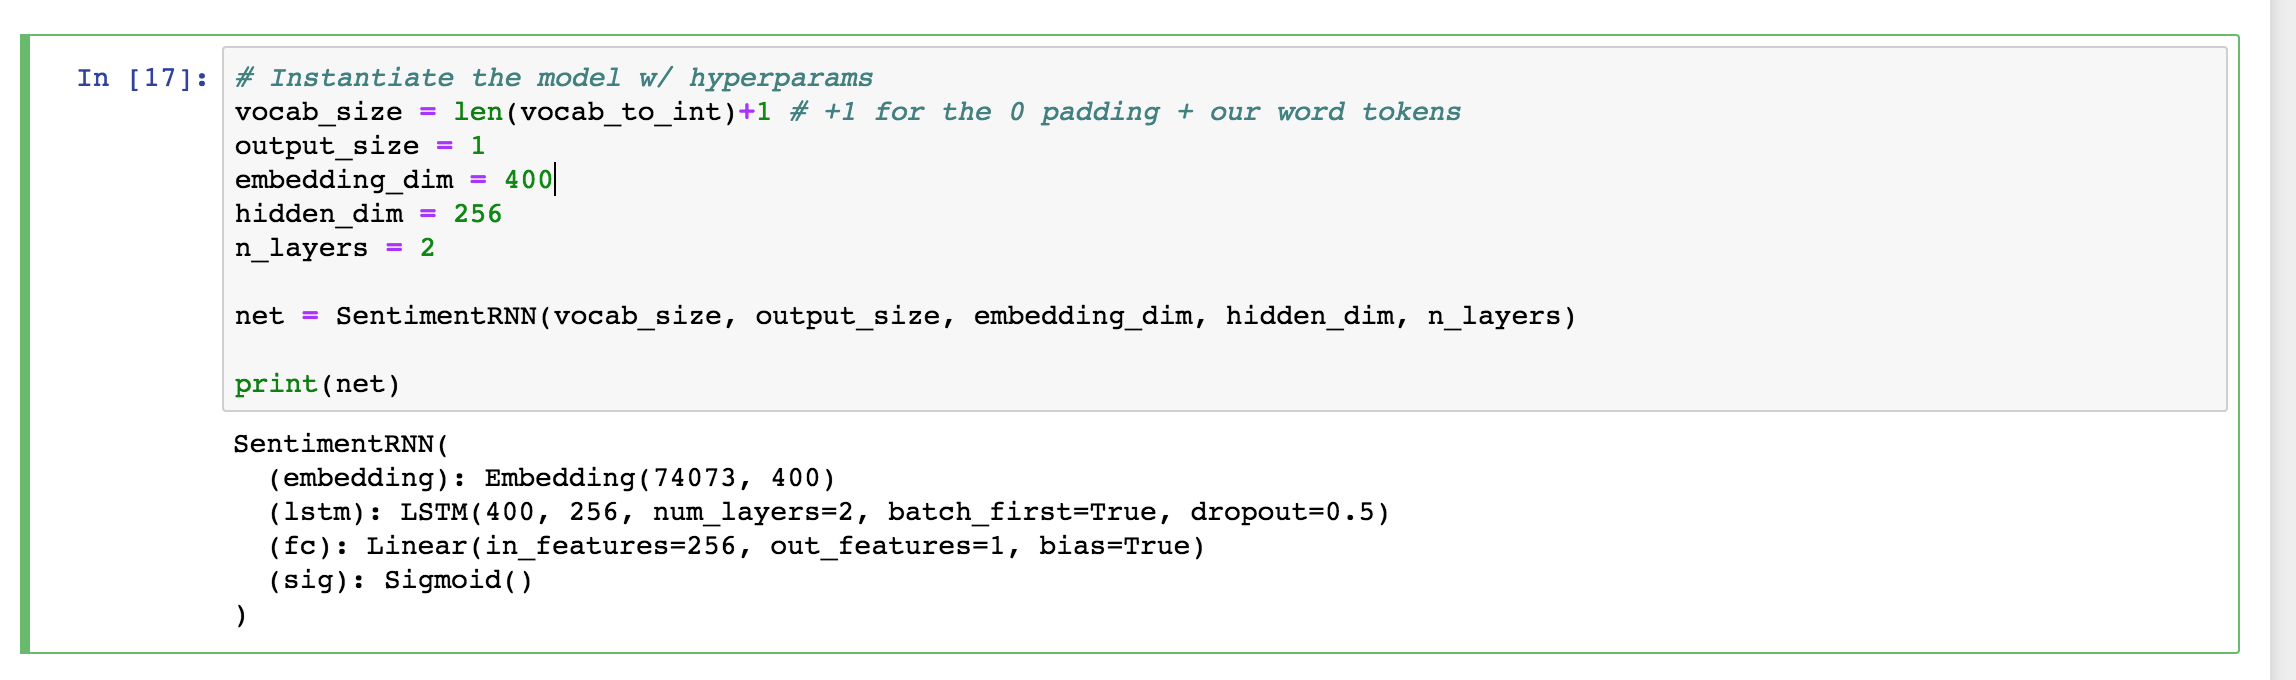
*Model hyperparameters*

### Training and Optimization

The training code, should look pretty familiar. One new detail is that, we'll be using a new kind of cross entropy loss that is designed to work with a single Sigmoid output.
>
>    *[BCELoss](https://pytorch.org/docs/stable/nn.html#bceloss), or __Binary Cross Entropy Loss__, applies cross entropy loss to a single value between 0 and 1.*
>

We'll define an Adam optimizer, as usual.
```python
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)
```

### Output, target format

You should also notice that, in the training loop, we are making sure that our outputs are squeezed so that they do not have an empty dimension ``output.squeeze()`` and the labels are float tensors, ``labels.float()``. Then we perform backpropagation as usual.

#### Train and eval mode

Below, you can also see that we switch between train and evaluation mode when the model is training versus when it is being evaluated on validation data!

#### Training Loop

Below, you’ll see a usual training loop.

I’m actually only going to do four epochs of training because that's about when I noticed the validation loss stop decreasing.

* You can see that I am initializing my hidden state before entering the batch loop then have my usual detachment from history for the hidden state and backpropagation steps.
* I’m getting my input and label data from my train_dataloader. Then applying my model to the inputs and comparing the outputs and the true labels.
* I also have some code that checks performance on my validation set, which, if you want, may be a great thing to use to decide when to stop training or which best model to save!
```python
# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))
```
Make sure to take a look at how training __and__ validation loss decrease during training! Then, once you're satisfied with your trained model, you can test it out in a couple ways to see how it behaves on new data!

### Consult the Solution Code

To take a closer look at this solution, feel free to check out the solution workspace or click [here](https://github.com/udacity/deep-learning-v2-pytorch/blob/master/sentiment-rnn/Sentiment_RNN_Solution.ipynb) to see it as a webpage.


## CHAPTER 12: Testing

### Testing the Trained Model

I want to show you two great ways to test: using test data and using inference. The first is similar to what you’ve seen in our CNN lessons. I am iterating through the test data in the test_loader, recording the test loss and calculating the accuracy based on how many labels this model got correct!

I’m doing this by looking at the rounded value of our output. Recall that this is a sigmoid output between 0-1 and so rounding this value will give us an integer that is the most likely label: 0 or 1. Then I’m comparing that predicted label to the true label; if it matches, I record that as a correctly-labeled test review.
```python
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()

    # get predicted outputs
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer

    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))
```
Below, I’m printing out the average test loss and the accuracy, which is just the number of correctly classified items divided by the number of pieces of test data,total.

We can see that the test loss is ``0.516`` and the accuracy is about __81.1%__ !

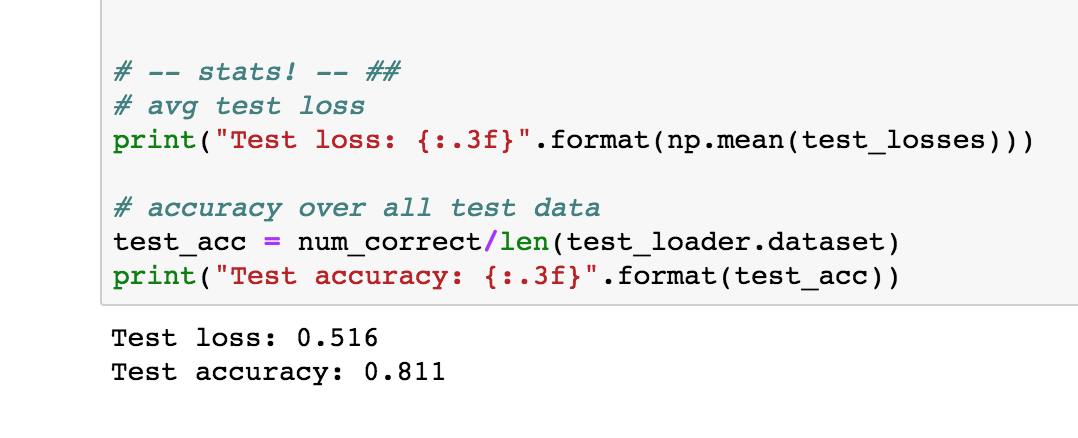
*Test results*

Next, you're ready for your last task! Which is to define a ``predict`` function to perform inference on any given text review!

### Exercise: Inference on a test review

You can change this ``test_review`` to any text that you want. Read it and think: is it pos or neg? Then see if your model predicts correctly!
>
>    *__Exercise__: Write a ``predict`` function that takes in a trained net, a plain text_review, and a sequence length, and prints out a custom statement for a positive or negative review!
>
>You can use any functions that you've already defined or define any helper functions you want to complete ``predict``, but it should just take in a trained net, a text review, and a sequence length.*
>
```python
def predict(net, test_review, sequence_length=200):
    ''' Prints out whether a give review is predicted to be 
        positive or negative in sentiment, using a trained model.

        params:
        net - A trained net 
        test_review - a review made of normal text and punctuation
        sequence_length - the padded length of a review
        '''


    # print custom response based on whether test_review is pos/neg
```

Try to solve this task on your own, then check out the solution, next!


## CHAPTER 13: Inference, Solution

### Inference

Let's put all these pieces together! One of the coolest ways to test a model like this is to give it user-generated data, without any true label, and see what happens. So, in this case, that data will just be a single string: a review that you can write and here’s just one ``test_reviewas`` an example:
```python
# negative test review
test_review_neg = 'The worst movie I have seen; acting was terrible and I want my money back. This movie had bad acting and the dialogue was slow.'
```
We can see that this review is a negative one, but let's see if our model can identify it's sentiment correctly!

Our task is to write a ``predict`` function that takes in a trained model, a ``test_review`` like this one that is just normal text and punctuation, a ``sequence_length`` for padding.

The process by which you make predictions based on user data, is called __inference__.

### Pre-process the ``test_review``

The first thing we'll have to do it to process the ``test_review``, so that it is converted into a tensor that our model can see as input. In fact, this involves quite a lot of pre-processing, but nothing that you haven't seen before!

I broke this down into a series of steps.

I have a helper function ``tokenize_review`` that is responsible for doing some data processing on my test_review.

It takes in my test_review, and then does a couple of things:

* First, I convert my ``test_review`` to lowercase, and remove any punctuation, so I’m left with all text.
* Then I breaks it into individual words with split(), and I’m left with a list of words in the review.
* I encode those words using the ``vocab_to_int`` dictionary that we already defined, near the start of this lesson.

Now, I am assuming a few things here, including: this review is one review, not a batch, and that this review only includes words already in our dictionary, and in this case that will be true, but you can add code to handle unknown characters, I just didn’t do that in my model.
```python
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints
```
Okay, so this tokenize function returns a list of integers; my tokenized review!

### Padding and converting into a Tensor

For my next couple of steps, I’m going to pad the ints, returned by the ``tokenize_review`` function and shape them into our ``sequence_length`` size; since our model was trained on sequence lengths of 200, I’m going to use the same length, here. I'll pad it using the ``pad_features`` function that we defined earlier.

Finally, I’m going to convert the padded result into a Tensor. So, these are all the steps, and I’m going to wrap this all up in my predict function.
```python
def predict(net, test_review, sequence_length=200):

    net.eval()

    # tokenize review
    test_ints = tokenize_review(test_review)

    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)

    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)

    batch_size = feature_tensor.size(0)

    # initialize hidden state
    h = net.init_hidden(batch_size)

    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()

    # get the output from the model
    output, h = net(feature_tensor, h)

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))

    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")
```
So, using the passed in arguments, I’m tokenizing my review using my helper function, then padding it using my pad function, and converting it into a Tensor that can be seen by my model.

Then, I’m passing this tensor into my trained net which will return an output of length one. With this output, I can grab the most likely class, which will be the rounded value 0 or 1; this is my prediction!

Lastly, I want to print out a custom message for a positive or negative detected review, and I’m doing that at the bottom of the above function!

__You can test this out on sample positive and negative text reviews to see how this trained model behaves!__ Below, you can see how it identifies our negative test review correctly.


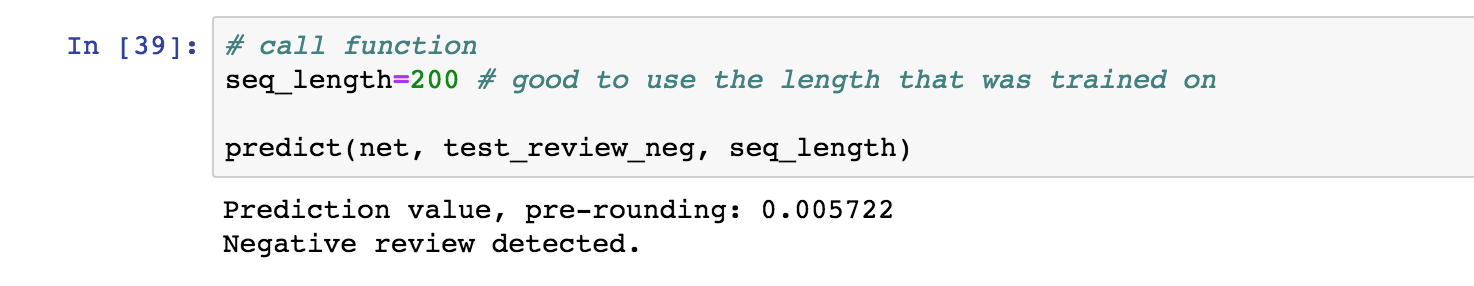
*Identifies negative review*

### Conclusion

Now that you have a trained model and a predict function, you can pass in any kind of text and this model will predict whether the text has a positive or negative sentiment. You can use this to try to find what words it associates with positive or negative sentiment.

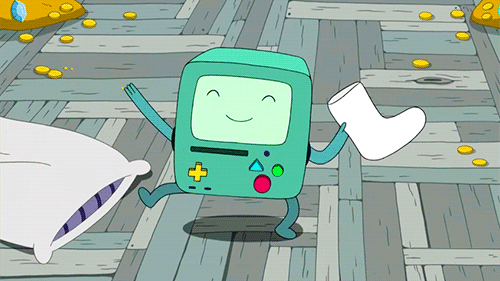
*Dancing Beemo from [Adventure Time]( https://en.wikipedia.org/wiki/Adventure_Time)to celebrate!*

Later, you'll learn how to deploy a model like this to a production environment so that it can respond to any kind of user data put into a web app!

__For now, great job implementing so many kinds of recurrent neural networks!!__
